# Air Pollution Forecasting Through AQI (Air Quality Index) Prediction
### By: Abigail Batinga

__Target Issue:__ Air pollution continues to affect local and global communities. Particularly, air pollution has a disproportionate effect on low income communities of color. Current air quality measurement software mainly show current AQI (air quality index) levels and while this may be helpful, being able to map out AQI forecasts for future dates similar to the way weather is forecasted can be even more helpful. By being able to forecast future AQI levels, we can help mitigate health defects and costs with proactive planning on the individual, national, local, and global level.<br>    
Predicting AQI accurately can be a significant challenge due to the fact that there are a such a large and changing variety of factors that contribute to AQI levels. Many current approaches to air pollution forecasting rely on weather forecasting hints to determine levels of air pollution. This makes sense because air pollution is highly correlated with local weather conditions. However, this doesn't fully assess the growing dangers of "ambient particulate air pollution" which refers to surrounding outdoor air quality that is transported through strong winds. Ambient particulate matter that pollutes air is considered to have the greatest effect on human health out of all forms of air pollution. According to the World Health Organization (WHO), 3.7 million premature deaths per year which represents 6.7% of the global disease burden is highly related to ambient particulate pollution. Furthermore, another 152,000 premature deaths can be attributed to ozone exposure. Along with this, these deaths occur as a result of multiple diseases putting certain communities at a particular risk. A graph from WHO of these diseases are shown in the graph below:
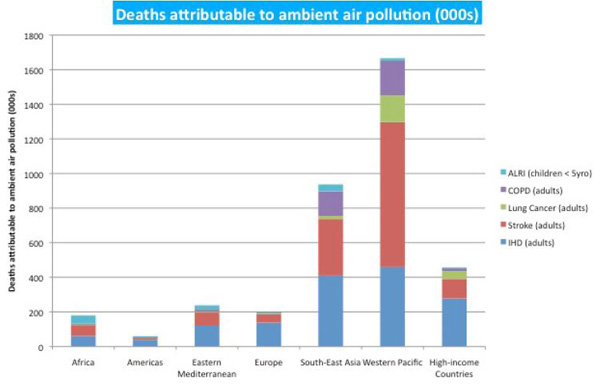 

__My Solution:__ Although there are current machine learning models aimed at predicting AQI, many of them don't fully consider the issues brought up through the topic of ambient particulate air pollution explained above. Many machine learning models that predict AQI don't focus on first taking pollutant concentrations to be the target variable. Instead, many current AQI machine learning models either rely on datasets that already include past recorded AQI levels or use weather data, both of which don't address the issue of ambient particulate air pollution. In order to create a model that can have the potential of effectively mitigating ambient particulate air pollution, the most accurate AQI predictions require taking local pollutant concentrations as the initial target variable. In my model, I will show the use of a regression approach that creates a pollutant concentration prediction to AQI calculation pipeline. Essentially, the model will predict various pollutant concentrations and then use these values to calculate AQI through the Environmental Protection Agency's (EPA) algorithm. Since I am simply prototyping this approach for this project, I will predict pollutant concentrations for only one pollutant in this notebook.

__Machine Learning Aspects:__

- Data Cleaning
- Feature Selection
- Data Analysis

## Importing Libraries and Modules

__Primary modules used:__

__- Numpy:__ Numerical Python. Numpy was used to store certain values in arrays as well as for some mathematical operations.

__- Pandas:__ Python Data Analysis Library. Pandas was primarily used to store my csv data files into a dataframe. This made it much easier to work with the data in python. Once in the dataframe, I was able to locate certain columns and variables.

__- Matplotlib:__ Python 2D Plotting Library. Matplotlib was used for data visualization and analysis. It was used for histograms and scatterplots.

__- Scikit-Learn:__ Scientific computing library. Scikit-Learn was used mainly for encoding certain variables, feature selection, and training with multiple classifiers.

__- Python-AQI:__ The Python AQI (Air Quality Index) library is used as part of the chemical monitor level prediction - AQI prediction pipeline. 

In [119]:
# import necessary modules
import pandas as pd
import numpy as np
import seaborn as sns
import pylab
import scipy.stats as stats
import numpy.random as random
import aqi
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import KFold
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler
from numpy.random import seed
from matplotlib import pyplot as plt

# About The Data

### Where was it sourced?
- This data was found on the UC Irvine Machine Learning Repository and obtained by the ENEA - National Agency for New Technologies, Energy and Sustainable Economic Development.

### What does it contain?
- This dataset contains 9358 instances of responses from 5 metal oxide chemical sensors embedded in an Air Quality Chemical Multisensor Device that were averaged hourly. The multisensor device was placed in a highly polluted area at road level in an Italian city and was recorded from March of 2004 to February of 2005.

### What does each data variable represent?
- 0 Date	(DD/MM/YYYY) 
- 1 Time	(HH.MM.SS) 
- 2 True hourly averaged concentration CO in mg/m^3 (reference analyzer) 
- 3 PT08.S1 (tin oxide) hourly averaged sensor response (nominally CO targeted)	
- 4 True hourly averaged overall Non Metanic HydroCarbons concentration in microg/m^3 (reference analyzer) 
- 5 True hourly averaged Benzene concentration in microg/m^3 (reference analyzer) 
- 6 PT08.S2 (titania) hourly averaged sensor response (nominally NMHC targeted)	
- 7 True hourly averaged NOx concentration in ppb (reference analyzer) 
- 8 PT08.S3 (tungsten oxide) hourly averaged sensor response (nominally NOx targeted) 
- 9 True hourly averaged NO2 concentration in microg/m^3 (reference analyzer)	
- 10 PT08.S4 (tungsten oxide) hourly averaged sensor response (nominally NO2 targeted)	
- 11 PT08.S5 (indium oxide) hourly averaged sensor response (nominally O3 targeted) 
- 12 Temperature in Â°C	
- 13 Relative Humidity (%) 
- 14 AH Absolute Humidity

In [81]:
# reading in data into a pandas dataframe
air_data = pd.read_excel('C:/Users/AMB708/Air_Quality_Prediction/AirQualityUCI.xlsx')

In [82]:
# various statistics about data
air_data.describe()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
count,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000
mean,-34.207524,1048.869652,-159.090093,1.865576,894.475963,168.604200,794.872333,58.135898,1391.363266,974.951534,9.776600,39.483611,-6.837604
std,77.657170,329.817015,139.789093,41.380154,342.315902,257.424561,321.977031,126.931428,467.192382,456.922728,43.203438,51.215645,38.976670
min,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000
25%,0.600000,921.000000,-200.000000,4.004958,711.000000,50.000000,637.000000,53.000000,1184.750000,699.750000,10.950000,34.050000,0.692275
50%,1.500000,1052.500000,-200.000000,7.886653,894.500000,141.000000,794.250000,96.000000,1445.500000,942.000000,17.200000,48.550000,0.976823
75%,2.600000,1221.250000,-200.000000,13.636091,1104.750000,284.200000,960.250000,133.000000,1662.000000,1255.250000,24.075000,61.875000,1.296223
max,11.900000,2039.750000,1189.000000,63.741476,2214.000000,1479.000000,2682.750000,339.700000,2775.000000,2522.750000,44.600000,88.725000,2.231036


In [83]:
# 9357 instances and 15 features
air_data.shape

(9357, 15)

# Preprocessing Data

### Removing unnecessary or missing data

- One important piece of information given by the data source was that missing values were imputated by a dummy value of -200. Due to this, the data analysis and training could potentially show false results because of this dummy value. 
- The first step for preprocessing was dropping any null values. Although this got rid of most null values, it didn't take care of the -200 dummy value imputations. In the case of my data, it made sense to imputate these null values with the mean or mode of the column instead (which is a common data science tool).

In [84]:
# remove null values, values that are null but not imputated by -200
air_data.dropna(axis=0, how='all')
air_data.dropna(axis=1, how='all')

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2004-03-10,18:00:00,2.6,1360.000000,150,11.881723,1045.500000,166.0,1056.250000,113.0,1692.000000,1267.500000,13.600000,48.875001,0.757754
1,2004-03-10,19:00:00,2.0,1292.250000,112,9.397165,954.750000,103.0,1173.750000,92.0,1558.750000,972.250000,13.300000,47.700000,0.725487
2,2004-03-10,20:00:00,2.2,1402.000000,88,8.997817,939.250000,131.0,1140.000000,114.0,1554.500000,1074.000000,11.900000,53.975000,0.750239
3,2004-03-10,21:00:00,2.2,1375.500000,80,9.228796,948.250000,172.0,1092.000000,122.0,1583.750000,1203.250000,11.000000,60.000000,0.786713
4,2004-03-10,22:00:00,1.6,1272.250000,51,6.518224,835.500000,131.0,1205.000000,116.0,1490.000000,1110.000000,11.150000,59.575001,0.788794
5,2004-03-10,23:00:00,1.2,1197.000000,38,4.741012,750.250000,89.0,1336.500000,96.0,1393.000000,949.250000,11.175000,59.175000,0.784772
6,2004-03-11,00:00:00,1.2,1185.000000,31,3.624399,689.500000,62.0,1461.750000,77.0,1332.750000,732.500000,11.325000,56.775000,0.760312
7,2004-03-11,01:00:00,1.0,1136.250000,31,3.326677,672.000000,62.0,1453.250000,76.0,1332.750000,729.500000,10.675000,60.000000,0.770238
8,2004-03-11,02:00:00,0.9,1094.000000,24,2.339416,608.500000,45.0,1579.000000,60.0,1276.000000,619.500000,10.650000,59.674999,0.764819
9,2004-03-11,03:00:00,0.6,1009.750000,19,1.696658,560.750000,-200.0,1705.000000,-200.0,1234.750000,501.250000,10.250000,60.200001,0.751657


In [85]:
# dataset description says that missing values are substituted by -200, so they need to be imputated
air_data.replace(to_replace= -200, value= np.NaN, inplace= True)
# https://github.com/shrikumarp/airquality/blob/master/AirQualityEDA_ADSAssignment1PartA.ipynb 

In [86]:
air_data.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2004-03-10,18:00:00,2.6,1360.00,150.0,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.60,48.875001,0.757754
1,2004-03-10,19:00:00,2.0,1292.25,112.0,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.30,47.700000,0.725487
2,2004-03-10,20:00:00,2.2,1402.00,88.0,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.90,53.975000,0.750239
3,2004-03-10,21:00:00,2.2,1375.50,80.0,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.00,60.000000,0.786713
4,2004-03-10,22:00:00,1.6,1272.25,51.0,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.15,59.575001,0.788794


# Exploratory Data Analysis

In [87]:
# imputate null values with either mean or mode
for col in air_data.columns:
    if air_data[col].dtype != 'object':
        air_data[col].fillna(air_data[col].mean(),inplace=True)
    else:
        air_data[col].fillna(air_data[col].mode(), inplace=True)

Text(0.5, 1, 'Correlation Map of Features')

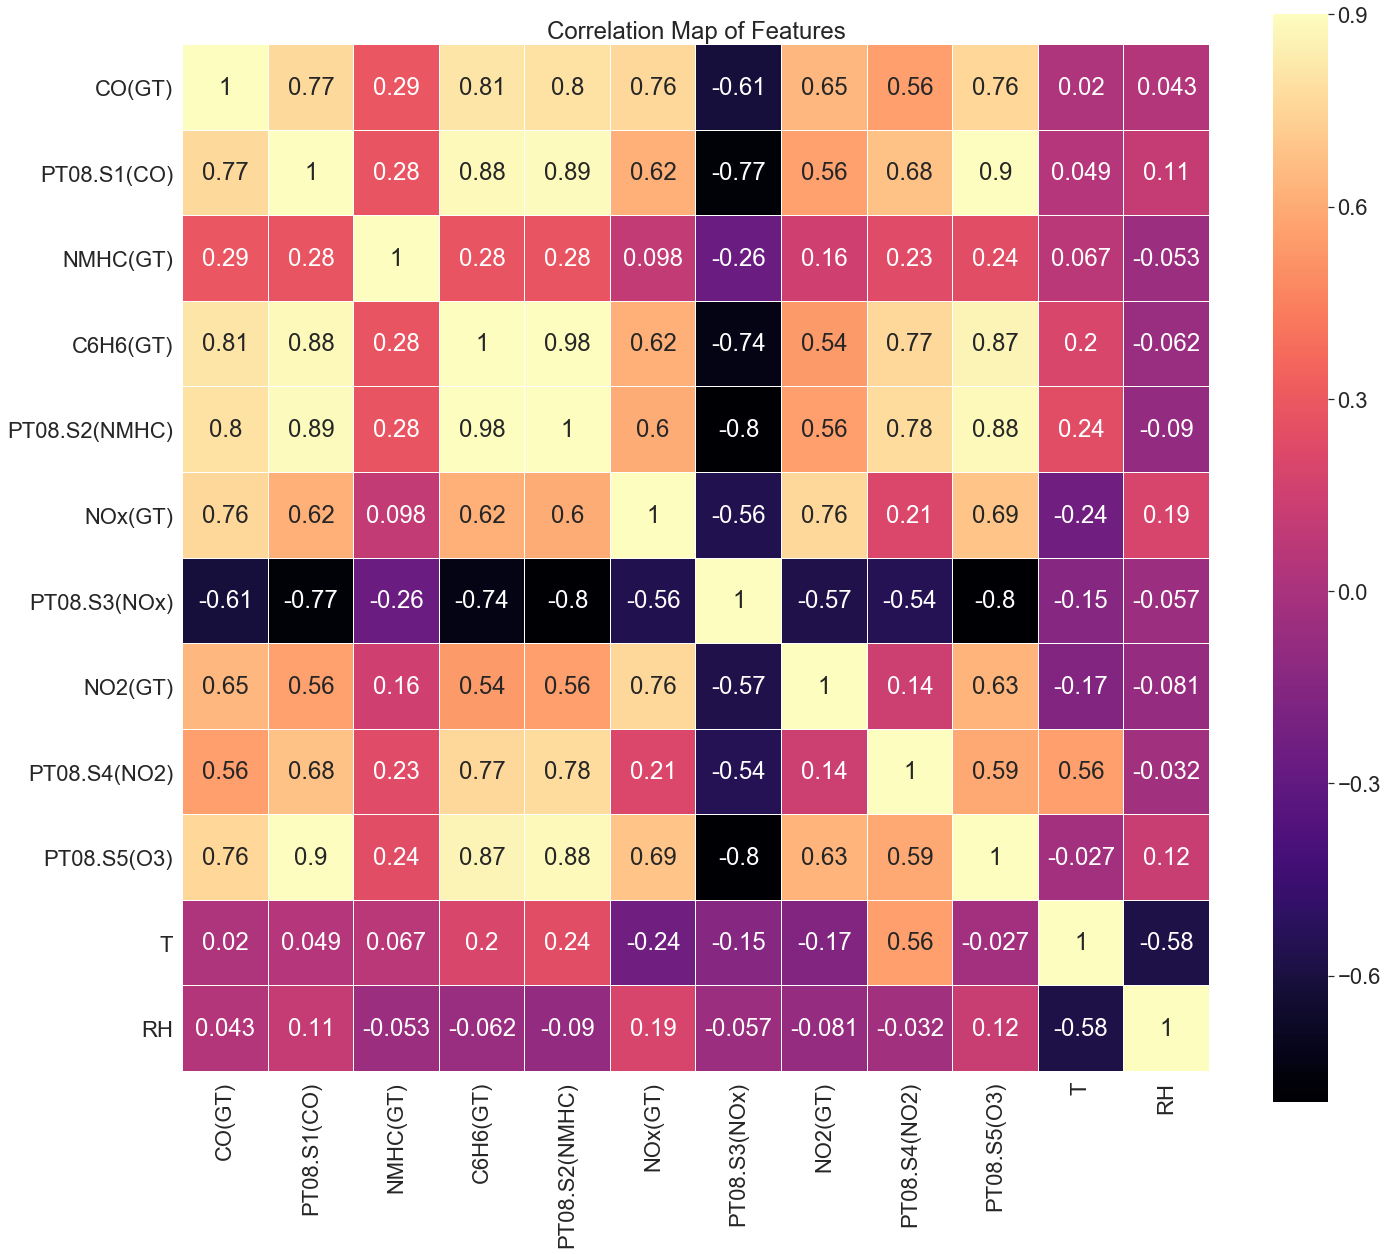

In [88]:
# assess correlation between features
num_features = air_data.columns[air_data.dtypes!=object]
num_features = num_features[1:-1]

corr_matrix = air_data[num_features].corr()
sns.set(font_scale = 2.0)
plt.figure(figsize=(23, 20))
sns.heatmap(corr_matrix, vmax = .9, linewidths = .03, square=True, annot=True,
            cmap = 'magma', linecolor="white")
plt.title("Correlation Map of Features")

In [89]:
#listing pairs in which correlation between variables is higher than 80%
corr = air_data.corr()
indices = np.where(corr > 0.8) 
indices = [(corr.columns[x], corr.columns[y]) for x, y in zip(*indices) if x != y and x < y]
indices 

[('CO(GT)', 'C6H6(GT)'),
 ('PT08.S1(CO)', 'C6H6(GT)'),
 ('PT08.S1(CO)', 'PT08.S2(NMHC)'),
 ('PT08.S1(CO)', 'PT08.S5(O3)'),
 ('C6H6(GT)', 'PT08.S2(NMHC)'),
 ('C6H6(GT)', 'PT08.S5(O3)'),
 ('PT08.S2(NMHC)', 'PT08.S5(O3)')]

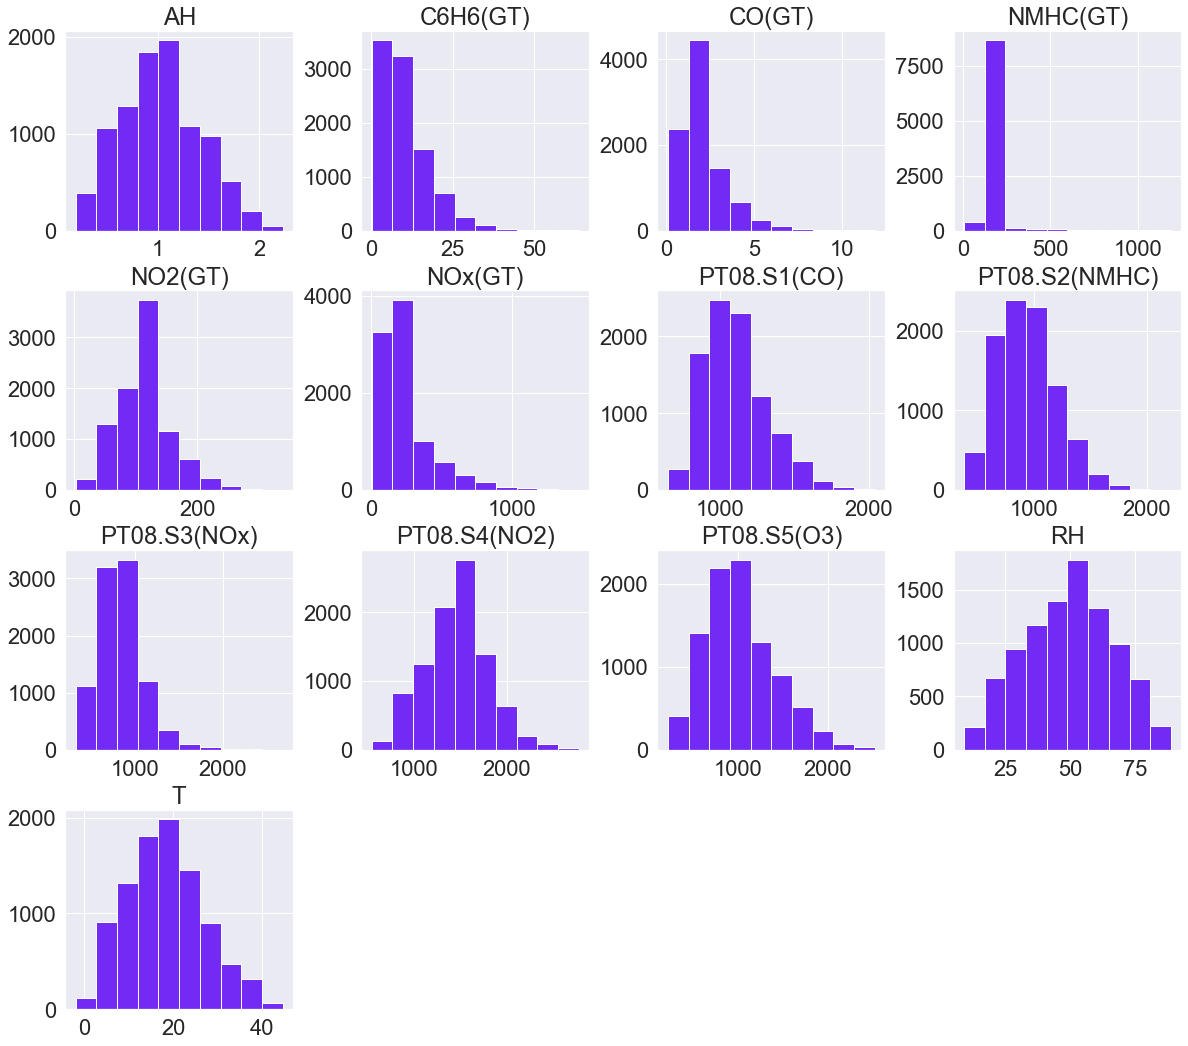

In [90]:
# assessing distribution of numeric data with histograms
air_data.hist(bins=10, figsize=(20,18), color='#742AF5')
plt.show()

In [91]:
# dropping datas found to be multicollinear and therefore redundant
features = air_data

In [92]:
# separating features and labels -- dropping benzene, time, date, and tin oxide s1
# features = features.drop('PTO8.S1(CO)', axis=1)
features = features.drop('Date', axis=1)
features = features.drop('Time', axis=1)
features = features.drop('C6H6(GT)',axis=1)
features = features.drop('PT08.S1(CO)', axis=1)


# creating labels -- O3
labels = air_data['C6H6(GT)'].values

In [93]:
features = features.values

In [94]:
# 80:20 split for train and test
train_x, test_x, train_y, test_y = train_test_split(features, labels, test_size=0.2)
print(train_x.shape)
print(test_x.shape)
print(train_y.shape)
print(test_y.shape)

(7485, 11)
(1872, 11)
(7485,)
(1872,)


## Training: Linear Regression

### The first approach I took was training my model through linear regression. There are certain assumptions about data used when performing linear regression:

- Little to no multicollinearity: Linear regression assumes that there is little to no multicollinearity between variables, hence why I plotted my variables on a correlation matrix and dropped independent variables with correlation greater than .8. This was tested through plotting the data on a correlation matrix.
- Linear Relationship: This is assumed by the data and by strong correlation between AQI level and specific pollutant levels.
- All variables must be multivariate normal: This was assessed through the histogram plots that showed a gaussian distribution across data for most variables.

In [95]:
# fitting model and making inference
regress = LinearRegression(fit_intercept=True)
model = regress.fit(train_x, train_y)
prediction = model.predict(test_x)


# formatting AQI values to 2 decimal places
float_formatter = lambda prediction: "%.3f" % prediction
np.set_printoptions(formatter={'float_kind':float_formatter})
print("Predicted values using Linear Regression for Carbon Monoxide levels: ", prediction[0:30])

# predict scores
print("The R^2 score is: %.4f"%r2_score(test_y, prediction))
print("The training score is: %.4f"%regress.score(train_x,train_y))
print("The testing score is:  %.4f"%regress.score(test_x,test_y))

Predicted values using Linear Regression for Carbon Monoxide levels:  [15.429 12.235 14.750 1.454 3.457 2.833 19.440 4.865 11.256 1.491 11.521
 10.288 4.067 6.705 3.260 16.329 5.412 10.685 10.049 4.822 7.670 26.520
 5.636 9.264 10.822 5.715 26.409 17.434 9.501 21.908]
The R^2 score is: 0.9741
The training score is: 0.9765
The testing score is:  0.9741


Text(0.5, 1.0, 'Linear Regression Predicted vs Actual')

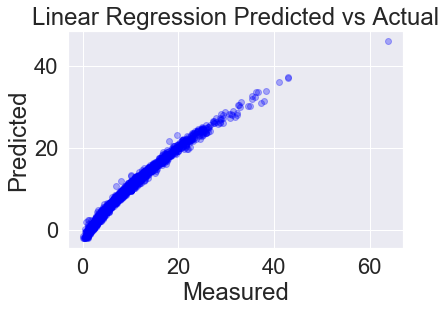

In [129]:
plt.scatter(test_y, prediction, c="blue", alpha=0.3)
plt.xlabel('Measured')
plt.ylabel('Predicted')
plt.title('Linear Regression Predicted vs Actual')

In [110]:
# convert carbon monoxide pollutant level to IAQI for first 30 values
for i in range(0, 29):
    co_aqi = aqi.to_iaqi(aqi.POLLUTANT_CO_8H, prediction[i], algo=aqi.ALGO_EPA)
    print(co_aqi)

200
147
188
16
39
32
227
54
130
16
135
113
45
73
36
206
60
120
109
54
82
274
62
98
123
63
273
214
101


# Source Citations

- Data Source from UC Irvine: https://archive.ics.uci.edu/ml/datasets/Air+quality

- Data about "Ambient Particulate Air Pollution" : https://public.wmo.int/en/resources/bulletin/air-quality-and-human-health-priority-joint-action 
- Assumptions about data used for linear regression: https://www.statisticssolutions.com/assumptions-of-linear-regression/ 
- Information about statistics concepts and particularly the use of linear regression was obtained through no other than: https://www.khanacademy.org/profile/kaid_492527809553273824987153/courses